### Module 7 - Lab CountVectorizer

#### import CountVectorizer from sklearn...  nltk, and matplotlib

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import matplotlib.pyplot as plt


#### create an instance of the CountVectorizer class. use a variable called vectorizer

In [5]:
vectorizer = CountVectorizer()


#### use the following sample text 

In [8]:
corpus = ['NLP is about text processing', 'Text processing is necessary.', 
          'Text processing is necessary and important.', 'Text processing is easy.']

#### Call the fit() function in order to learn a vocabulary from the corpus.

In [11]:
vectorizer.fit(corpus)


CountVectorizer()

#### Let's inspect  how our vectorizer vectorized the text
#### print out a list of words used, and their index in the vectors

In [17]:
print("Vocabulary and indices:")
print(vectorizer.vocabulary_)


Vocabulary and indices:
{'nlp': 6, 'is': 4, 'about': 0, 'text': 8, 'processing': 7, 'necessary': 5, 'and': 1, 'important': 3, 'easy': 2}


#### create a vector by passing the text into the vectorizer to get back counts

In [20]:
vector = vectorizer.transform(corpus)


#### display the full vector. <br> use vector.toarray()

In [23]:
print("\nVectorized form (word counts):")
print(vector.toarray())



Vectorized form (word counts):
[[1 0 0 0 1 0 1 1 1]
 [0 0 0 0 1 1 0 1 1]
 [0 1 0 1 1 1 0 1 1]
 [0 0 1 0 1 0 0 1 1]]


#### print the One Hot vector for the word: "necessary"

In [25]:
word_index = vectorizer.vocabulary_.get("necessary")
print(f"\nOne-hot vector for the word 'necessary' (index {word_index}):")
print(vector.toarray()[:, word_index])



One-hot vector for the word 'necessary' (index 5):
[0 1 1 0]


#### get the feature names

In [28]:
feature_names = vectorizer.get_feature_names_out()
print("\nFeature names (words):")
print(feature_names)



Feature names (words):
['about' 'and' 'easy' 'important' 'is' 'necessary' 'nlp' 'processing'
 'text']


#### print the Frequency Distribution of the same text (corpus) using nltk.FreqDist()

In [37]:
corpus = """NLP is about text processing, Text processing is necessary., 
          Text processing is necessary and important., Text processing is easy."""


Frequency Distribution of the corpus:
[('is', 4), ('text', 4), ('processing', 4), (',', 3), ('nlp', 1), ('about', 1), ('necessary.', 1), ('necessary', 1), ('and', 1), ('important.', 1), ('easy', 1), ('.', 1)]


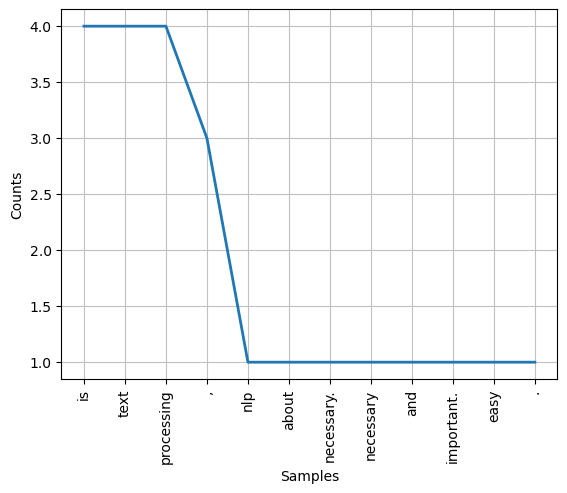

In [51]:
text_corpus = """NLP is about text processing, Text processing is necessary., 
          Text processing is necessary and important., Text processing is easy."""

words = nltk.word_tokenize(text_corpus.lower())

fdist = FreqDist(words)

print("\nFrequency Distribution of the corpus:")
print(fdist.most_common())

fdist.plot(30, cumulative=False)
plt.show()


### Part 2 - Let's use the Naive Bayes classifier

#### import pandas, os, numpy, train_test_split, CountVectorizer, accuracy_score, and MultinomialNB

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

### import the three text files provided: yelp_labelled.txt, amazon_cells_labelled.txt, and imdb_labelled.txt

In [83]:
import pandas as pd

filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name: yelp, imdb, or amazon
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                       positive
source                          yelp
Name: 0, dtype: object


#### display the first five records

In [86]:
print("\nFirst five records:")
print(df.head())



First five records:
                                            sentence     label source
0                           Wow... Loved this place.  positive   yelp
1                                 Crust is not good.  negative   yelp
2          Not tasty and the texture was just nasty.  negative   yelp
3  Stopped by during the late May bank holiday of...  positive   yelp
4  The selection on the menu was great and so wer...  positive   yelp


#### display the last 10 "negative" reviews (sentences)

In [89]:
print("\nLast 10 negative reviews:")
negative_reviews = df[df['label'] == 0].tail(10)
print(negative_reviews[['sentence']])



Last 10 negative reviews:
Empty DataFrame
Columns: [sentence]
Index: []


In [17]:
# sample

,sentence,label,source
720,"If you act in such a film, you should be glad ...",negative,imdb
721,This one wants to surf on the small wave of sp...,negative,imdb
722,If you haven't choked in your own vomit by the...,negative,imdb
725,"Instead, we got a bore fest about a whiny, spo...",negative,imdb
742,I never walked out of a movie faster.,negative,imdb
743,I just got bored watching Jessice Lange take h...,negative,imdb
744,"Unfortunately, any virtue in this film's produ...",negative,imdb
745,"In a word, it is embarrassing.",negative,imdb
746,Exceptionally bad!,negative,imdb
747,All in all its an insult to one's intelligence...,negative,imdb


### Split the Test and Train Data into these variables: make the test size = 25% and random state = 42
### train_set, test_set, train_label, test_label

In [97]:
train_set, test_set, train_label, test_label = train_test_split(
    df['sentence'], df['label'], test_size=0.25, random_state=42)


#### print the number of records in the train and test sets

In [100]:
print(f"Number of records in the training set: {len(train_set)}")
print(f"Number of records in the test set: {len(test_set)}")


Number of records in the training set: 2061
Number of records in the test set: 687


### Vectorize text data. Use the variables: countvect, x_counts, x_train_df, x_test_df

In [106]:
countvect = CountVectorizer()
x_counts = countvect.fit_transform(df['sentence'])

# preparing for training set
x_train_df = countvect.fit_transform(train_set)

# preparing for test set
x_test_df = countvect.transform(test_set)

#### print the shape of x_train_df

In [111]:
print(f"Shape of x_train_df: {x_train_df.shape}")

Shape of x_train_df: (2061, 4336)


#### Training the model

### use the Naive Bayes classifier. Use a variable called "clf" and fit the data (x_train_df,train_set.label)

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()

clf.fit(x_train_df, train_label)


MultinomialNB()

### Test the model and print the accuracy of the Naive Bayes Classifier

In [119]:
predictions = clf.predict(x_test_df)

accuracy = accuracy_score(test_label, predictions)
print(f"Accuracy of Naive Bayes Classifier: {accuracy:.4f}")

Accuracy of Naive Bayes Classifier: 0.8079


#### Do you believe this is a low accuracy value?

An accuracy of 80.79% for a Naive Bayes classifier is generally considered solid in text classification tasks, such as sentiment analysis of user reviews. This level of accuracy indicates significant improvement over random classifiers, which typically achieve around 50%. However, factors like task complexity, class imbalance, and the model's assumptions should be considered when evaluating this performance. To improve accuracy further, techniques such as feature engineering, trying different models (like Logistic Regression or SVM), and enhancing text preprocessing can be effective.

#### create a function classify_review with a parameter called text. assing countvect.transform([text]) to a variable called pred1, and return clf.predict(pred1)[0]

In [122]:
def classify_review(text):
    # your code goes here
    pred1 = countvect.transform([text])
    # end of your code
    return clf.predict(pred1)[0]

#### Test the model calling the function classify_review using the following sentences: <br> "The food was amazing !!" and "The food was awful !!"

In [ ]:
test_reviews = [
    "The food was amazing !!",
    "The food was awful !!"
]

for review in test_reviews:
    result = classify_review(review)
    print(f"The sentiment of the review '{review}' is: {result}")


## Part 3 - Let's use Keras

### import all the libraries needed: keras, Sequential, Tokenizer, KerasClassifier, LogisticRegression, OneHotEncoder, pad_sequences, tensorflow, layers, LabelEncoder, os, etc. 

In [137]:
!pip install keras tensorflow


In [141]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#### display the first five records of "df"

In [148]:
print(df.head())


                                            sentence     label source
0                           Wow... Loved this place.  positive   yelp
1                                 Crust is not good.  negative   yelp
2          Not tasty and the texture was just nasty.  negative   yelp
3  Stopped by during the late May bank holiday of...  positive   yelp
4  The selection on the menu was great and so wer...  positive   yelp


#### rename the columns: for the "label" change negative for 0 and possitive for 1 and rename the colunns v1: negative, v2: sentence <br> use inplace=True

In [151]:
df['label'] = df['label'].map({'negative': 0, 'positive': 1})
df.rename(columns={'label': 'negative', 'sentence': 'v2'}, inplace=True)


#### display the top five records again

In [156]:
print(df.head())


                                                  v2  negative source
0                           Wow... Loved this place.         1   yelp
1                                 Crust is not good.         0   yelp
2          Not tasty and the texture was just nasty.         0   yelp
3  Stopped by during the late May bank holiday of...         1   yelp
4  The selection on the menu was great and so wer...         1   yelp


#### import train_test_split from sklearn.model_selection

In [159]:
from sklearn.model_selection import train_test_split


#### split the data using the variables: X_train, X_test, y_train, y_test <br> test size = 0.2 and random_state=42 <br> hint: train_test_split(df['sentence'], df['label']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['negative'], test_size=0.2, random_state=42)


### create an instance of the CountVectorizer class, Call the fit(X_train) function in order to learn a vocabulary from one or more documents, and apply vectorizer.transform to X_train and X_test

In [164]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
# Enter two more lines of code here:

x_train_counts = vectorizer.transform(X_train)
x_test_counts = vectorizer.transform(X_test)


### create a variable called "logreg" and create an instance of the LogisticRegression. Then fit the data on (X_train_cv, y_train)

In [167]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train_counts, y_train)


LogisticRegression()

### create a variable called y_pred and predict the value of X_test_cv usign logreg.predict <br> then print the accuracy of the logistic regression classifier

In [170]:
from sklearn.metrics import accuracy_score


y_pred = logreg.predict(x_test_counts)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression Classifier: {accuracy:.4f}')


Accuracy of Logistic Regression Classifier: 0.8273


### What model gave you a hiher accuracy, logistic regression or the Naive Bayes classifier? 

The accuracy of the models was compared based on the results obtained from their respective classifications. The Logistic Regression classifier achieved an accuracy of 0.8273, while the Naive Bayes classifier recorded a slightly lower accuracy of 0.8079. This indicates that the Logistic Regression model performed better than the Naive Bayes classifier on the dataset used for the classification task. Overall, the findings suggest that Logistic Regression is a more effective model for this particular scenario.

#### Tokenizing and Padding

In [36]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

X_train_emb = tokenizer.texts_to_sequences(X_train)
X_test_emb = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[0])
print(X_train_emb[0])

0                             Wow... Loved this place.
0    A very, very, very slow-moving, aimless movie ...
Name: sentence, dtype: object
[124, 314, 289, 2, 755, 916, 8, 101, 290, 15, 6]


#### All the messages should have the same lenght. 

### Use pad_sequences to make the maxlen of all the messages = 100 and apply this to the X_train and X_test values. <br> Then print (X_train[0, :])

In [177]:
maxlen = 100
### your code goes here:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)


X_train_emb = tokenizer.texts_to_sequences(X_train)
X_test_emb = tokenizer.texts_to_sequences(X_test)


maxlen = 100  
X_train_padded = pad_sequences(X_train_emb, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_emb, maxlen=maxlen)


print(X_train_padded[0])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124
 314 289   2 755 916   8 101 290  15   6]


### Build the Neural Network model

The layers are stacked sequentially to build the classifier:

create the model = keras.Sequential()

The first layer is an Embedding layer. make it embedding_dim = 50.  This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).

Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 neurons and activation function relu


The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level. 

compile the model using: optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']

In [188]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Assuming you have your training and test data (X_train, X_test) defined
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_emb = tokenizer.texts_to_sequences(X_train)
X_test_emb = tokenizer.texts_to_sequences(X_test)

# Define vocab_size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the reserved 0 index

# Create the model
model = Sequential()

# Add the Embedding layer (removed input_length)
embedding_dim = 50
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# Add GlobalAveragePooling1D layer
model.add(GlobalAveragePooling1D())

# Add hidden layer with 16 neurons and activation function 'relu'
model.add(Dense(16, activation='relu'))

# Add output layer with one neuron and activation 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### print the summary of the model

In [190]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### fit the model using: X_train, y_train, epochs=30, verbose = 1, validation_data=(X_test, y_test), batch_size=32

In [192]:
history = model.fit(X_train_padded, y_train, 
                    epochs=30, 
                    verbose=1, 
                    validation_data=(X_test_padded, y_test), 
                    batch_size=32)


Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4756 - loss: 0.6938 - val_accuracy: 0.4818 - val_loss: 0.6939
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.4818 - val_loss: 0.6942
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5204 - loss: 0.6919 - val_accuracy: 0.4818 - val_loss: 0.6935
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4876 - loss: 0.6929 - val_accuracy: 0.4873 - val_loss: 0.6916
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5431 - loss: 0.6901 - val_accuracy: 0.4818 - val_loss: 0.6912
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5633 - loss: 0.6878 - val_accuracy: 0.5255 - val_loss: 0.6868
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5736 - loss: 0.6822 - val_accuracy: 0.4818 - val_loss: 0.7011
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5677 - loss: 0.6684 - val_accuracy: 0.6164 - val_loss:

#### evaluate the model and print the training and testing accuracy

In [194]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)

print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")  # Last epoch training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.7653 - loss: 0.4632
Training Accuracy: 0.9440
Testing Accuracy: 0.7564
